## EDA from DB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cx_Oracle

In [2]:
def get_data_from_db(query):
    conn = cx_Oracle.connect('hoseo', 'hoseo', 'localhost:1521/xe')
    df = pd.read_sql(query, conn)
    conn.close()
    return df

### 지역별 전체 매매건수

In [3]:
query = """
    SELECT region as 지역, count(*) as 거래건수
    FROM APT_DEAL_PRICE
    GROUP BY region
    ORDER BY region ASC
    """

In [4]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   거래건수    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,거래건수
0,강원도,142353
1,경기도,1334713
2,경상남도,300502
3,경상북도,196949
4,광주광역시,183148


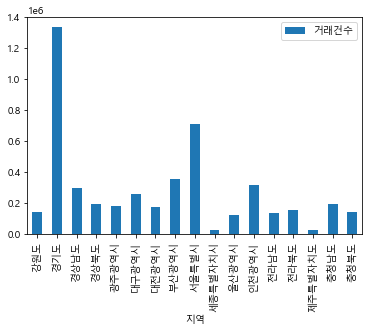

In [5]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', y='거래건수', rot=90)
plt.show()

### 지역별 소형 중형 대형별 매매건수

In [6]:
query = """
    SELECT region as 지역, count(*) as 소형건수
    FROM APT_DEAL_PRICE
    WHERE apt_size < 60
    GROUP BY region
    ORDER BY region
    """

In [7]:
df1 = get_data_from_db(query)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   소형건수    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,소형건수
0,강원도,78603
1,경기도,504061
2,경상남도,134626
3,경상북도,94499
4,광주광역시,79499


In [8]:
query = """
    SELECT region as 지역, count(*) as 중형건수
    FROM APT_DEAL_PRICE
    WHERE apt_size BETWEEN 60 AND 85
    GROUP BY region
    ORDER BY region
    """

In [9]:
df2 = get_data_from_db(query)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   중형건수    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,중형건수
0,강원도,51809
1,경기도,595877
2,경상남도,137789
3,경상북도,84202
4,광주광역시,82387


In [10]:
query = """
    SELECT region as 지역, count(*) as 대형건수
    FROM APT_DEAL_PRICE
    WHERE apt_size > 85
    GROUP BY region
    ORDER BY region
    """

In [11]:
df3 = get_data_from_db(query)
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   대형건수    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,대형건수
0,강원도,11941
1,경기도,234775
2,경상남도,28087
3,경상북도,18248
4,광주광역시,21262


In [21]:
dataD = df1.merge(df2, on='지역').merge(df3, on='지역')
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   소형건수    17 non-null     int64 
 2   중형건수    17 non-null     int64 
 3   대형건수    17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 680.0+ bytes


,지역,소형건수,중형건수,대형건수
0,강원도,78603,51809,11941
1,경기도,504061,595877,234775
2,경상남도,134626,137789,28087
3,경상북도,94499,84202,18248
4,광주광역시,79499,82387,21262


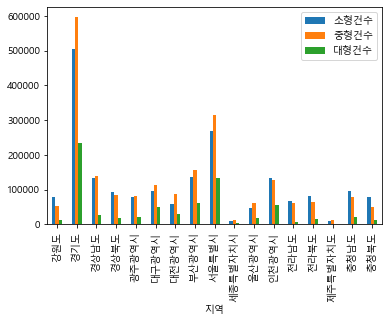

In [23]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', rot=90)
plt.show()

### 지역별 평균 거래금액

In [24]:
query = """
    SELECT region as 지역, AVG(contract_price) as 평균거래금액
    FROM APT_DEAL_PRICE
    GROUP BY region
    ORDER BY region
    """

In [25]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   평균거래금액  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,평균거래금액
0,강원도,1.283586e+08
1,경기도,3.083282e+08
2,경상남도,1.811539e+08
3,경상북도,1.388568e+08
4,광주광역시,1.891000e+08


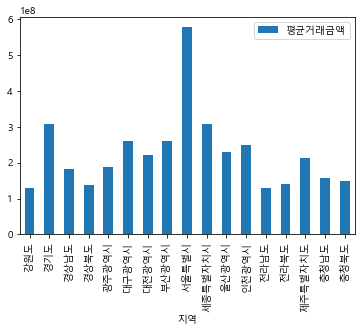

In [28]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', y='평균거래금액', rot=90)
plt.show()

### 지역별 평균 면적

In [29]:
query = """
    SELECT region as 지역, AVG(apt_size) as 평균면적m2
    FROM APT_DEAL_PRICE
    GROUP BY region
    ORDER BY region
    """

In [30]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   평균면적M2  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,평균면적M2
0,강원도,67.972494
1,경기도,78.337085
2,경상남도,72.747086
3,경상북도,71.402030
4,광주광역시,74.724864


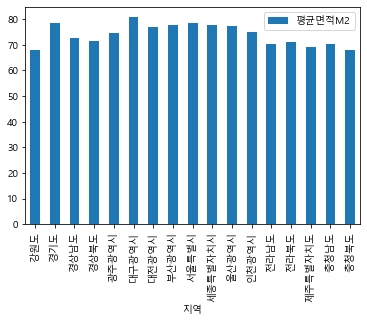

In [32]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', y='평균면적M2', rot=90)
plt.show()

### 지역별 동일평수 가격 비교

In [36]:
query = """
    SELECT region as 지역, COUNT(DISTINCT apt_size) as 평형
    FROM APT_DEAL_PRICE
    GROUP BY region
    ORDER BY region
    """

In [37]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   평형      17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


,지역,평형
0,강원도,1712
1,경기도,7534
2,경상남도,3883
3,경상북도,3026
4,광주광역시,1581


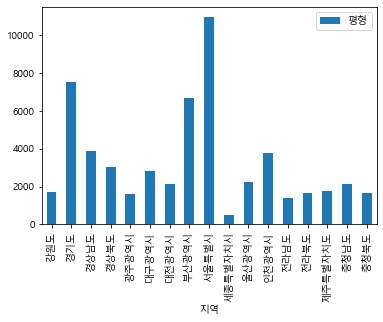

In [38]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', y='평형', rot=90)
plt.show()

In [41]:
query = """
    SELECT region as 지역, AVG(contract_price) as 소형평균거래금액
    FROM APT_DEAL_PRICE
    WHERE apt_size < 60
    GROUP BY region
    ORDER BY region
    """

In [42]:
df1 = get_data_from_db(query)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역        17 non-null     object 
 1   소형평균거래금액  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,소형평균거래금액
0,강원도,8.398403e+07
1,경기도,2.125880e+08
2,경상남도,1.254252e+08
3,경상북도,8.395296e+07
4,광주광역시,1.179138e+08


In [43]:
query = """
    SELECT region as 지역, AVG(contract_price) as 중형평균거래금액
    FROM APT_DEAL_PRICE
    WHERE apt_size BETWEEN 60 AND 85
    GROUP BY region
    ORDER BY region
    """

In [44]:
df2 = get_data_from_db(query)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역        17 non-null     object 
 1   중형평균거래금액  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,중형평균거래금액
0,강원도,1.694107e+08
1,경기도,3.214149e+08
2,경상남도,2.073070e+08
3,경상북도,1.709731e+08
4,광주광역시,2.174484e+08


In [45]:
query = """
    SELECT region as 지역, AVG(contract_price) as 대형평균거래금액
    FROM APT_DEAL_PRICE
    WHERE apt_size > 85
    GROUP BY region
    ORDER BY region
    """

In [46]:
df3 = get_data_from_db(query)
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역        17 non-null     object 
 1   대형평균거래금액  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,대형평균거래금액
0,강원도,2.423450e+08
1,경기도,4.806672e+08
2,경상남도,3.199704e+08
3,경상북도,2.749868e+08
4,광주광역시,3.454209e+08


In [47]:
dataD = df1.merge(df2, on='지역').merge(df3, on='지역')
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역        17 non-null     object 
 1   소형평균거래금액  17 non-null     float64
 2   중형평균거래금액  17 non-null     float64
 3   대형평균거래금액  17 non-null     float64
dtypes: float64(3), object(1)
memory usage: 680.0+ bytes


,지역,소형평균거래금액,중형평균거래금액,대형평균거래금액
0,강원도,8.398403e+07,1.694107e+08,2.423450e+08
1,경기도,2.125880e+08,3.214149e+08,4.806672e+08
2,경상남도,1.254252e+08,2.073070e+08,3.199704e+08
3,경상북도,8.395296e+07,1.709731e+08,2.749868e+08
4,광주광역시,1.179138e+08,2.174484e+08,3.454209e+08


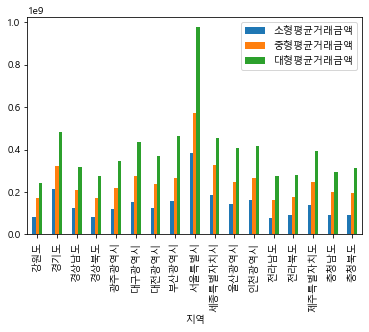

In [49]:
plt.rc('font', family='Malgun Gothic')
ax = dataD.plot.bar(x='지역', rot=90)
plt.show()

### 지역별 동일평수 가격 변동

In [54]:
query = """
    SELECT region as 지역, AVG(contract_price) as 소형2012
    FROM APT_DEAL_PRICE
    WHERE apt_size < 60 AND contract_date BETWEEN '2012/08/24' AND '2013/01/01'
    GROUP BY region
    ORDER BY region
    """

In [55]:
df1 = get_data_from_db(query)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   소형2012  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


,지역,소형2012
0,강원도,7.022702e+07
1,경기도,1.621816e+08
2,경상남도,1.109088e+08
3,경상북도,7.112188e+07
4,광주광역시,9.571677e+07
